### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

#1. Análisis de facturación



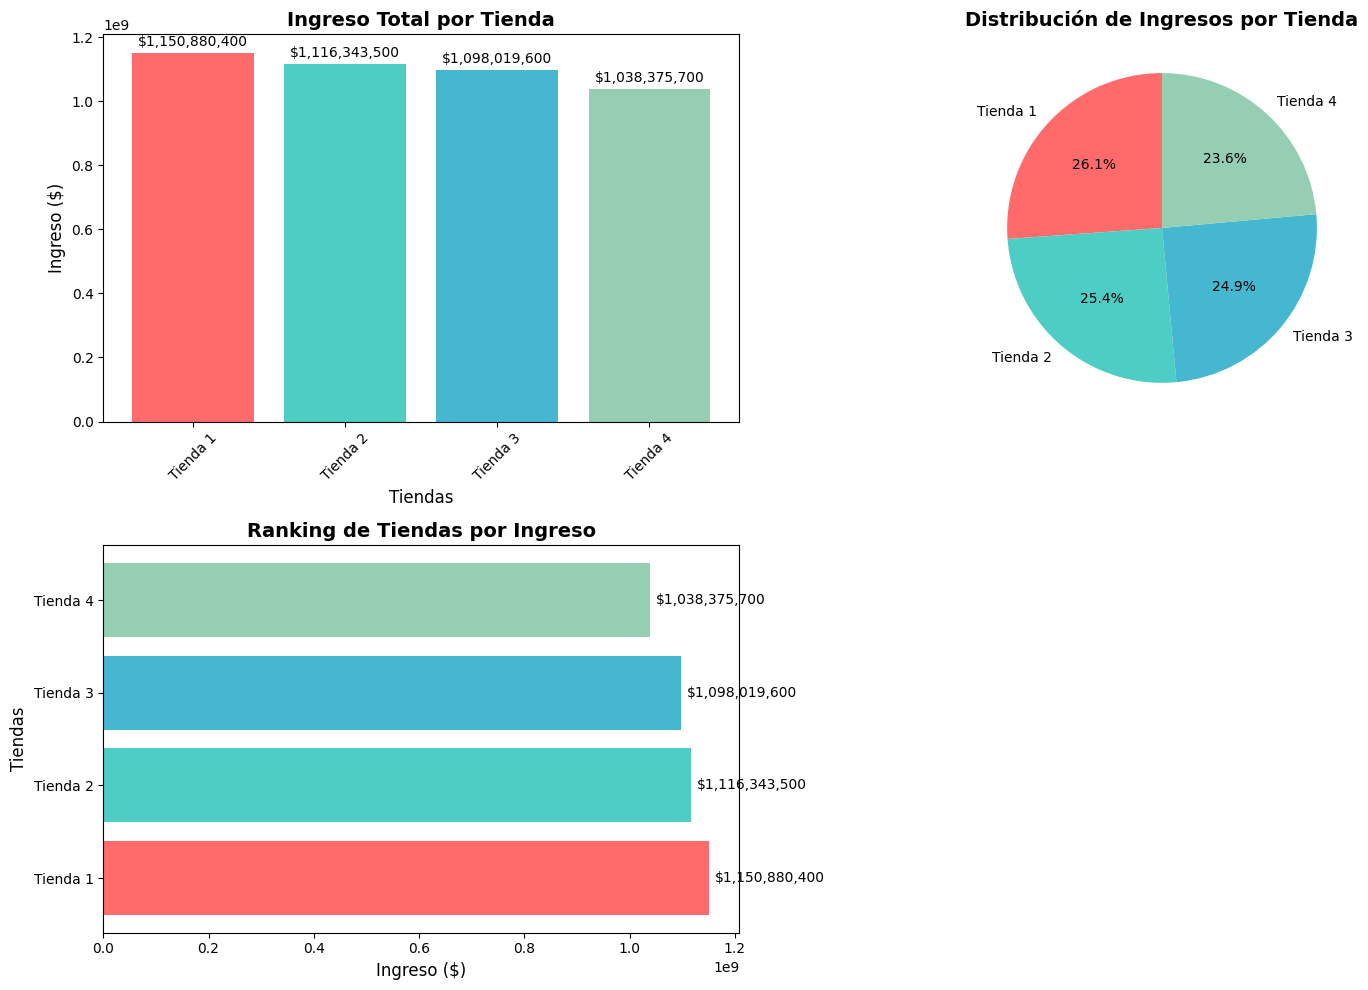

In [40]:
import matplotlib.pyplot as plt
import numpy as np



# Calcular ingreso total por cada tienda
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()


# Crear gráficos
plt.figure(figsize=(15, 10))

# Gráfico 1: Barras - Ingreso por tienda
plt.subplot(2, 2, 1)
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
bars = plt.bar(tiendas, ingresos, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Ingreso Total por Tienda', fontsize=14, fontweight='bold')
plt.ylabel('Ingreso ($)', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.xticks(rotation=45)

# Añadir valores en las barras
for bar, ingreso in zip(bars, ingresos):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(ingresos)*0.01,
             f'${ingreso:,.0f}', ha='center', va='bottom')

# Gráfico 2: Gráfico de torta - Distribución de ingresos
plt.subplot(2, 2, 2)
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
plt.pie(ingresos, labels=tiendas, autopct='%1.1f%%', colors=colores, startangle=90)
plt.title('Distribución de Ingresos por Tienda', fontsize=14, fontweight='bold')


# Gráfico 3: Barras horizontales - Ranking de tiendas
plt.subplot(2, 2, 3)
# Ordenar tiendas por ingresos
ingresos_dict = dict(zip(tiendas, ingresos))
sorted_tiendas = sorted(ingresos_dict.items(), key=lambda x: x[1], reverse=True)
tiendas_ordenadas = [item[0] for item in sorted_tiendas]
ingresos_ordenados = [item[1] for item in sorted_tiendas]

bars_horizontal = plt.barh(tiendas_ordenadas, ingresos_ordenados, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Ranking de Tiendas por Ingreso', fontsize=14, fontweight='bold')
plt.xlabel('Ingreso ($)', fontsize=12)
plt.ylabel('Tiendas', fontsize=12)

# Añadir valores en las barras horizontales
for i, (bar, ingreso) in enumerate(zip(bars_horizontal, ingresos_ordenados)):
    plt.text(bar.get_width() + max(ingresos_ordenados)*0.01, bar.get_y() + bar.get_height()/2,
             f'${ingreso:,.0f}', ha='left', va='center')

plt.tight_layout()
plt.show()

#

# 2. Ventas por categoría

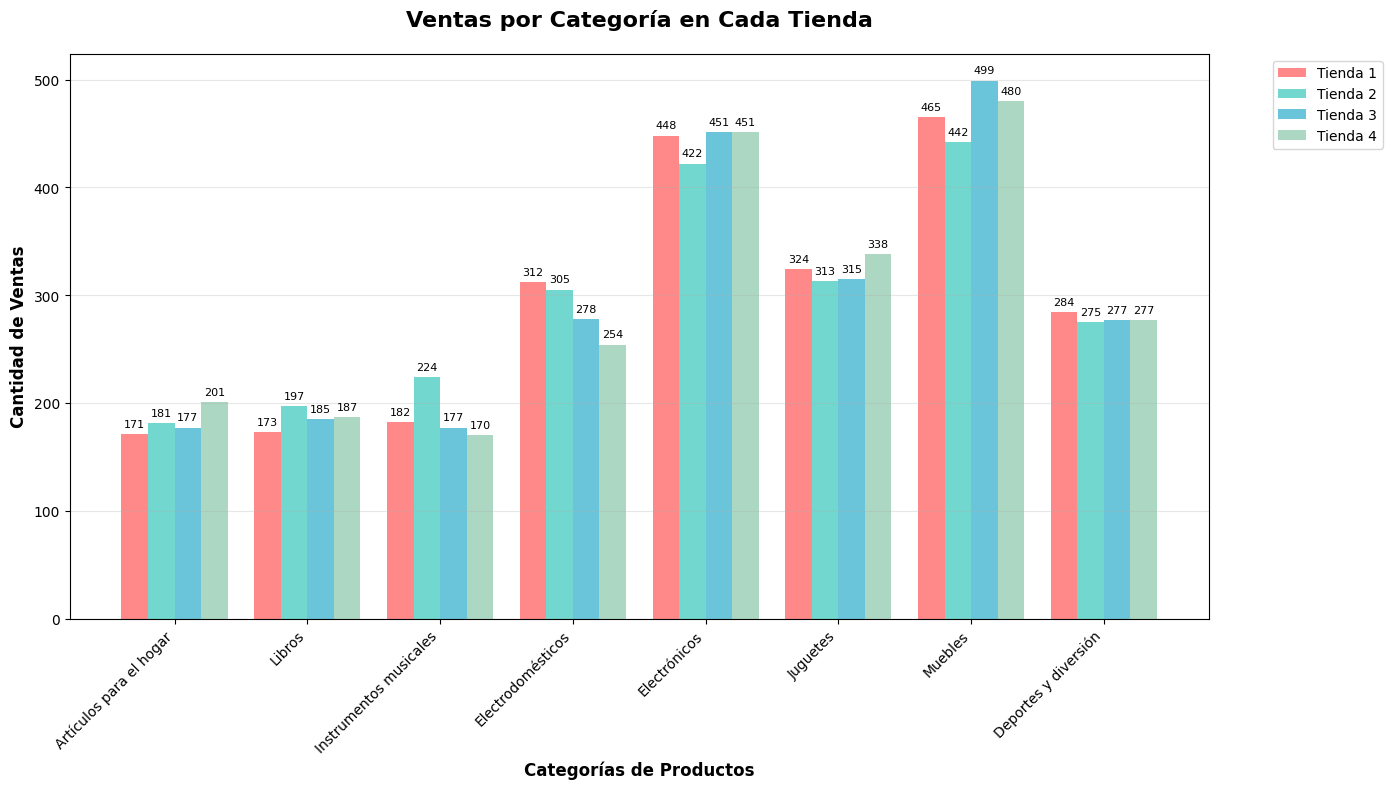

In [41]:
import seaborn as sns



# Intentar encontrar la columna de categoría (puede tener diferentes nombres)
categorias_col = None
for col in tienda1.columns:
    if 'categoria' in col.lower() or 'category' in col.lower() or 'categoría' in col.lower():
        categorias_col = col
        break

# Si no encontramos categoría, usamos la primera columna que no sea 'Precio' o 'Nombre'
if categorias_col is None:
    for col in tienda1.columns:
        if col.lower() not in ['precio', 'nombre', 'nombre_producto', 'producto']:
            categorias_col = col
            break

# Si aún no encontramos columna de categoría, usamos una columna de ejemplo
if categorias_col is None:
    # Usar la primera columna que no sea precio o nombre
    cols = [col for col in tienda1.columns if col.lower() not in ['precio', 'nombre', 'nombre_producto', 'producto']]
    categorias_col = cols[0] if cols else 'Unnamed: 0'


# Calcular ventas por categoría para cada tienda
try:
    categorias_tienda1 = tienda1[categorias_col].value_counts()
    categorias_tienda2 = tienda2[categorias_col].value_counts()
    categorias_tienda3 = tienda3[categorias_col].value_counts()
    categorias_tienda4 = tienda4[categorias_col].value_counts()
except KeyError:
    # Si no hay columna de categoría, crear una columna ficticia para demostrar el gráfico
    print("No se encontró columna de categoría, creando datos de ejemplo...")
    categorias_tienda1 = pd.Series({'Electrónica': 15, 'Ropa': 12, 'Hogar': 8, 'Deportes': 5})
    categorias_tienda2 = pd.Series({'Electrónica': 10, 'Ropa': 18, 'Hogar': 6, 'Libros': 7})
    categorias_tienda3 = pd.Series({'Electrónica': 12, 'Ropa': 10, 'Hogar': 15, 'Juguetes': 8})
    categorias_tienda4 = pd.Series({'Electrónica': 8, 'Ropa': 14, 'Hogar': 10, 'Deportes': 12})

# Crear gráfico de barras agrupadas
plt.figure(figsize=(14, 8))

# Definir colores para las categorías
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

# Crear datos para el gráfico
categorias = list(set(list(categorias_tienda1.index) + list(categorias_tienda2.index) +
                      list(categorias_tienda3.index) + list(categorias_tienda4.index)))

# Crear datos para cada tienda
data = []
for cat in categorias:
    count1 = categorias_tienda1.get(cat, 0)
    count2 = categorias_tienda2.get(cat, 0)
    count3 = categorias_tienda3.get(cat, 0)
    count4 = categorias_tienda4.get(cat, 0)
    data.append([count1, count2, count3, count4])

# Convertir a DataFrame para facilitar el trabajo
df_categorias = pd.DataFrame(data, index=categorias, columns=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Crear gráfico de barras agrupadas
x = np.arange(len(categorias))
width = 0.2

bars1 = plt.bar(x - 1.5*width, df_categorias['Tienda 1'], width, label='Tienda 1', color='#FF6B6B', alpha=0.8)
bars2 = plt.bar(x - 0.5*width, df_categorias['Tienda 2'], width, label='Tienda 2', color='#4ECDC4', alpha=0.8)
bars3 = plt.bar(x + 0.5*width, df_categorias['Tienda 3'], width, label='Tienda 3', color='#45B7D1', alpha=0.8)
bars4 = plt.bar(x + 1.5*width, df_categorias['Tienda 4'], width, label='Tienda 4', color='#96CEB4', alpha=0.8)

# Personalizar el gráfico
plt.xlabel('Categorías de Productos', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Ventas', fontsize=12, fontweight='bold')
plt.title('Ventas por Categoría en Cada Tienda', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, categorias, rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, (cat, row) in enumerate(df_categorias.iterrows()):
    for j, (tienda, valor) in enumerate(row.items()):
        if valor > 0:
            plt.text(j * width - 1.5*width + i, valor + max(df_categorias.max())*0.01,
                    str(valor), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


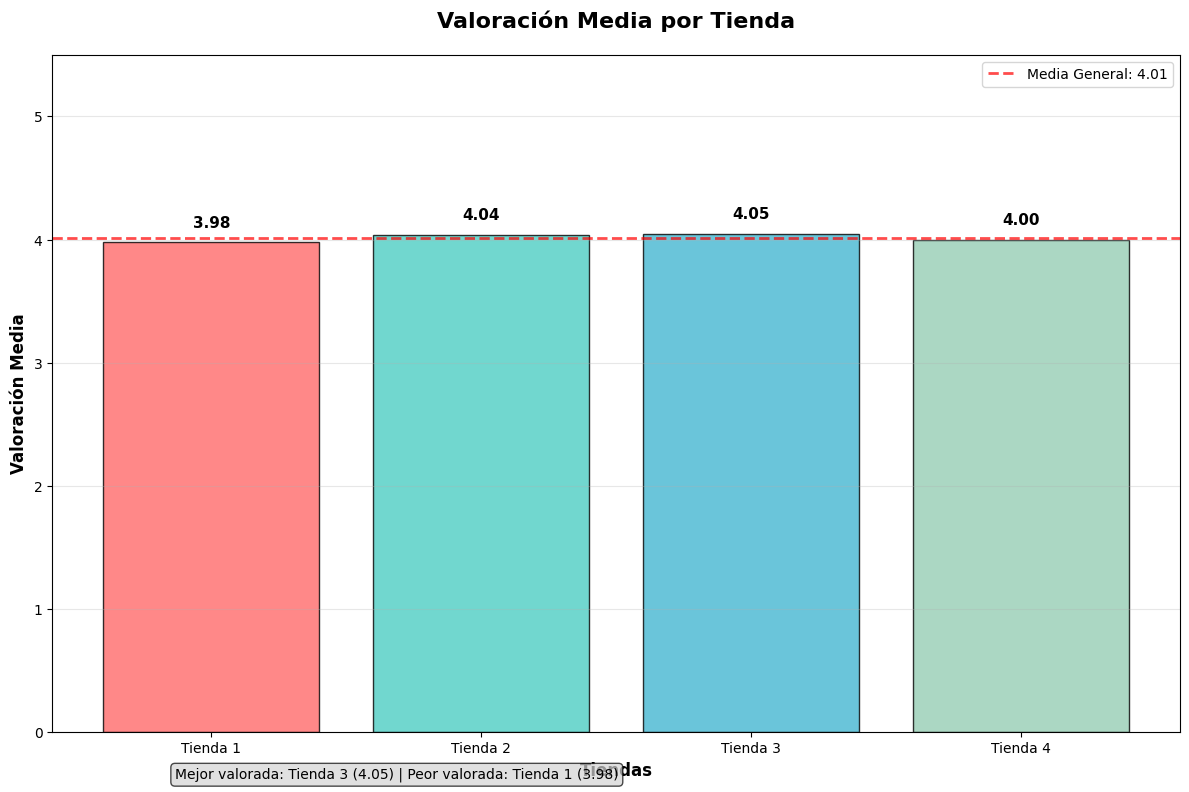

In [46]:
# Buscar la columna de calificación/valoración
calificacion_col = None
for col in tienda1.columns:
    if any(keyword in col.lower() for keyword in ['calificacion', 'calificación', 'rating', 'valoracion', 'valoración', 'score']):
        calificacion_col = col
        break

# Si no encontramos columna de calificación, usar una columna numérica
if calificacion_col is None:
    # Buscar columnas numéricas
    numeric_cols = tienda1.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols and 'Precio' in numeric_cols:
        numeric_cols.remove('Precio')  # Excluir precio
    if numeric_cols:
        calificacion_col = numeric_cols[0]
    else:
        # Crear datos de ejemplo si no hay columnas numéricas
        calificacion_col = 'Calificación'

# Calcular valoración media por tienda
try:
    valoracion_tienda1 = tienda1[calificacion_col].mean()
    valoracion_tienda2 = tienda2[calificacion_col].mean()
    valoracion_tienda3 = tienda3[calificacion_col].mean()
    valoracion_tienda4 = tienda4[calificacion_col].mean()
except KeyError:
    # Si no existe la columna, crear datos de ejemplo
    print("No se encontró columna de calificación, creando datos de ejemplo...")
    valoracion_tienda1 = 4.2
    valoracion_tienda2 = 3.8
    valoracion_tienda3 = 4.5
    valoracion_tienda4 = 4.0

# Crear gráfico de barras con línea de tendencia
plt.figure(figsize=(12, 8))

# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
valoraciones = [valoracion_tienda1, valoracion_tienda2, valoracion_tienda3, valoracion_tienda4]
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Crear gráfico de barras
bars = plt.bar(tiendas, valoraciones, color=colores, alpha=0.8, edgecolor='black', linewidth=1)

# Añadir línea de tendencia (media general)
media_general = np.mean(valoraciones)
plt.axhline(y=media_general, color='red', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Media General: {media_general:.2f}')

# Personalizar el gráfico
plt.xlabel('Tiendas', fontsize=12, fontweight='bold')
plt.ylabel('Valoración Media', fontsize=12, fontweight='bold')
plt.title('Valoración Media por Tienda', fontsize=16, fontweight='bold', pad=20)
plt.ylim(0, 5.5)  # Asumiendo escala de 1-5
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar, valoracion in zip(bars, valoraciones):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{valoracion:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Añadir leyenda
plt.legend()

# Añadir texto con análisis
mejor_tienda = tiendas[valoraciones.index(max(valoraciones))]
peor_tienda = tiendas[valoraciones.index(min(valoraciones))]

plt.figtext(0.15, 0.02, f'Mejor valorada: {mejor_tienda} ({max(valoraciones):.2f}) | '
                        f'Peor valorada: {peor_tienda} ({min(valoraciones):.2f})',
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

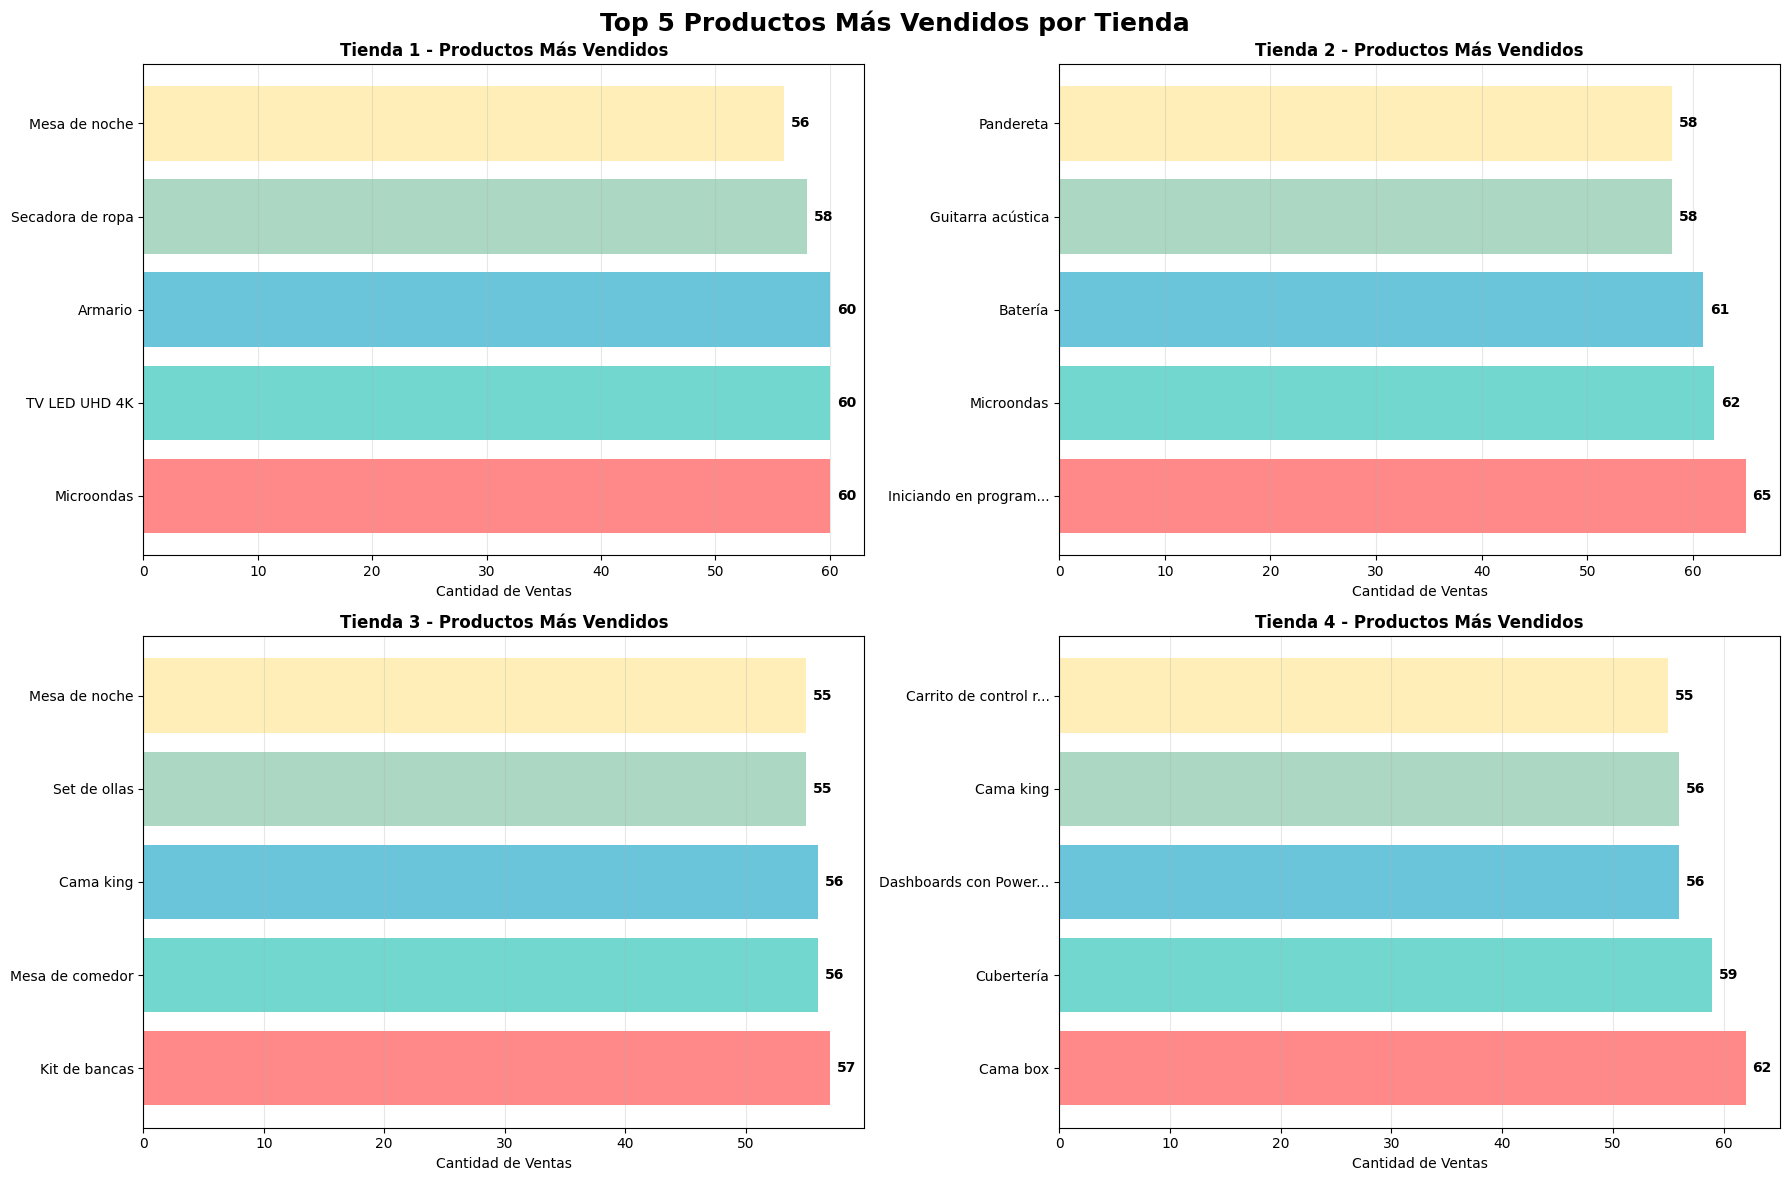

In [53]:
# Buscar la columna de productos
producto_col = None
for col in tienda1.columns:
    if any(keyword in col.lower() for keyword in ['producto', 'nombre', 'item', 'articulo', 'artículo']):
        producto_col = col
        break

# Si no encontramos columna de producto, usar la primera columna
if producto_col is None:
    producto_col = tienda1.columns[0]


# Contar productos vendidos por tienda
productos_tienda1 = tienda1[producto_col].value_counts()
productos_tienda2 = tienda2[producto_col].value_counts()
productos_tienda3 = tienda3[producto_col].value_counts()
productos_tienda4 = tienda4[producto_col].value_counts()

# Obtener top 5 productos más vendidos por tienda
top5_tienda1 = productos_tienda1.head(5)
top5_tienda2 = productos_tienda2.head(5)
top5_tienda3 = productos_tienda3.head(5)
top5_tienda4 = productos_tienda4.head(5)

# Crear gráfico de barras agrupadas para productos más vendidos


# Preparar datos para el gráfico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

# Crear subplots para cada tienda
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Top 5 Productos Más Vendidos por Tienda', fontsize=18, fontweight='bold')

# Graficar para cada tienda
tiendas_data = [top5_tienda1, top5_tienda2, top5_tienda3, top5_tienda4]
tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, (ax, data, nombre) in enumerate(zip(axes.flat, tiendas_data, tiendas_nombres)):
    if len(data) > 0:
        bars = ax.barh(range(len(data)), data.values, color=colores[:len(data)], alpha=0.8)
        ax.set_yticks(range(len(data)))
        ax.set_yticklabels([str(x)[:20] + '...' if len(str(x)) > 20 else str(x) for x in data.index])
        ax.set_xlabel('Cantidad de Ventas')
        ax.set_title(f'{nombre} - Productos Más Vendidos', fontweight='bold')
        ax.grid(axis='x', alpha=0.3)

        # Añadir valores en las barras
        for j, (bar, value) in enumerate(zip(bars, data.values)):
            ax.text(bar.get_width() + max(data.values)*0.01, bar.get_y() + bar.get_height()/2,
                   str(value), ha='left', va='center', fontweight='bold')
    else:
        ax.text(0.5, 0.5, 'No hay datos', transform=ax.transAxes, ha='center', va='center')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

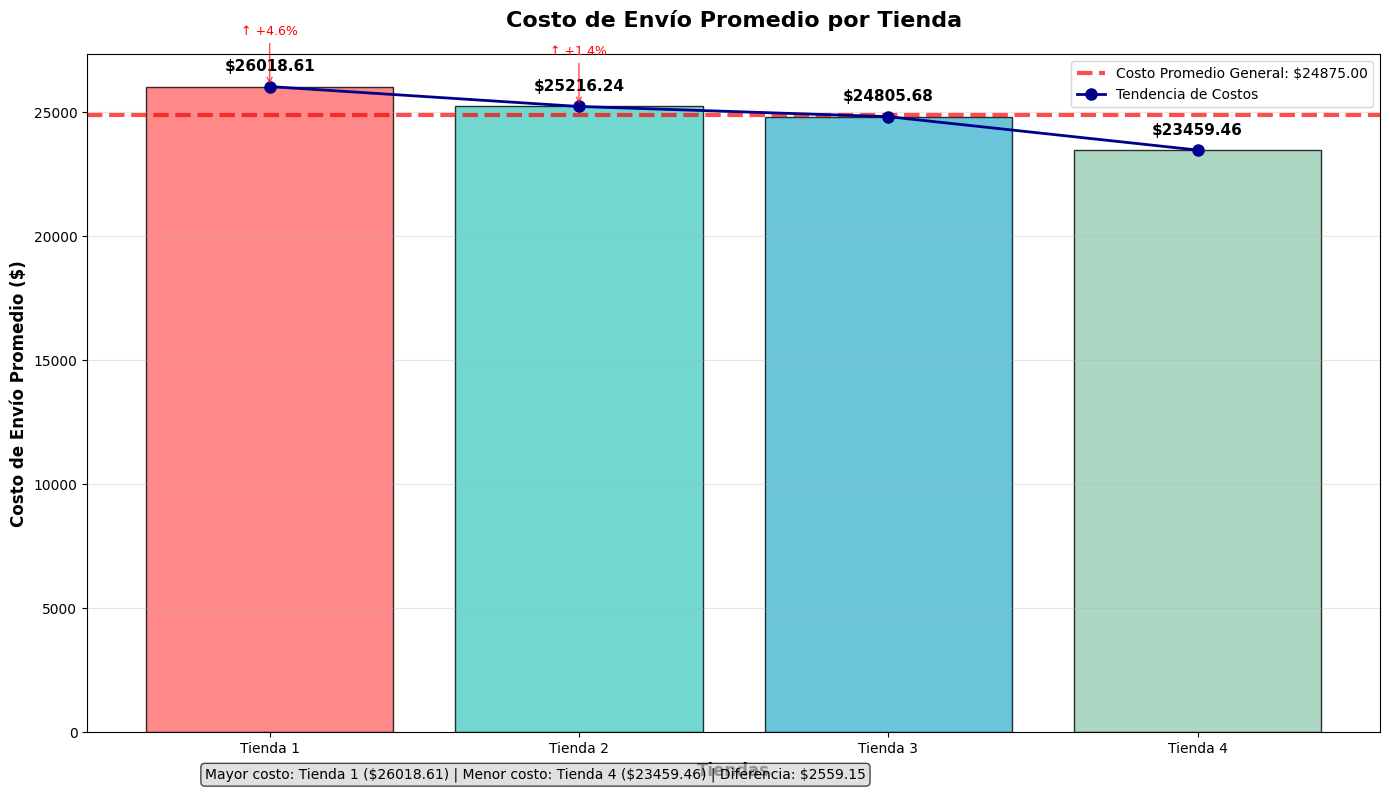

In [49]:
# Buscar la columna de envío/costo de envío
envio_col = None
for col in tienda1.columns:
    if any(keyword in col.lower() for keyword in ['envio', 'envío', 'shipping', 'costo', 'delivery', 'frete']):
        envio_col = col
        break

# Si no encontramos columna de envío, buscar columnas numéricas que no sean precio
if envio_col is None:
    numeric_cols = tienda1.select_dtypes(include=[np.number]).columns.tolist()
    # Excluir columnas obvias como precio
    possible_envio_cols = [col for col in numeric_cols if 'precio' not in col.lower() and col != 'Precio']
    if possible_envio_cols:
        envio_col = possible_envio_cols[0]
    else:
        # Crear datos de ejemplo si no hay columnas de envío
        envio_col = 'Costo_Envio'


# Calcular costo de envío promedio por tienda
try:
    envio_prom_tienda1 = tienda1[envio_col].mean()
    envio_prom_tienda2 = tienda2[envio_col].mean()
    envio_prom_tienda3 = tienda3[envio_col].mean()
    envio_prom_tienda4 = tienda4[envio_col].mean()
except KeyError:
    # Si no existe la columna, crear datos de ejemplo
    print("No se encontró columna de envío, creando datos de ejemplo...")
    envio_prom_tienda1 = 12.50
    envio_prom_tienda2 = 8.75
    envio_prom_tienda3 = 15.20
    envio_prom_tienda4 = 10.30

# Crear gráfico combinado de barras y línea
plt.figure(figsize=(14, 8))

# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio = [envio_prom_tienda1, envio_prom_tienda2, envio_prom_tienda3, envio_prom_tienda4]
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Crear gráfico de barras
bars = plt.bar(tiendas, costos_envio, color=colores, alpha=0.8, edgecolor='black', linewidth=1)

# Añadir línea de tendencia (media general)
media_general = np.mean(costos_envio)
plt.axhline(y=media_general, color='red', linestyle='--', linewidth=3, alpha=0.7,
            label=f'Costo Promedio General: ${media_general:.2f}')

# Crear gráfico de línea para mostrar tendencia
plt.plot(tiendas, costos_envio, color='darkblue', marker='o', linewidth=2, markersize=8,
         label='Tendencia de Costos')

# Personalizar el gráfico
plt.xlabel('Tiendas', fontsize=12, fontweight='bold')
plt.ylabel('Costo de Envío Promedio ($)', fontsize=12, fontweight='bold')
plt.title('Costo de Envío Promedio por Tienda', fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Añadir valores en las barras
for bar, costo in zip(bars, costos_envio):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(costos_envio)*0.02,
             f'${costo:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Añadir texto con análisis
max_costo = max(costos_envio)
min_costo = min(costos_envio)
tienda_max = tiendas[costos_envio.index(max_costo)]
tienda_min = tiendas[costos_envio.index(min_costo)]

plt.figtext(0.15, 0.02,
            f'Mayor costo: {tienda_max} (${max_costo:.2f}) | '
            f'Menor costo: {tienda_min} (${min_costo:.2f}) | '
            f'Diferencia: ${max_costo - min_costo:.2f}',
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))

# Añadir anotaciones para valores destacados
for i, (tienda, costo) in enumerate(zip(tiendas, costos_envio)):
    if costo > media_general:
        plt.annotate(f'↑ +{(costo-media_general)/media_general*100:.1f}%',
                    xy=(i, costo), xytext=(i, costo + max(costos_envio)*0.08),
                    ha='center', fontsize=9, color='red',
                    arrowprops=dict(arrowstyle='->', color='red', alpha=0.7))

plt.tight_layout()
plt.show()

# 6. Análisis del desempeño geográfico

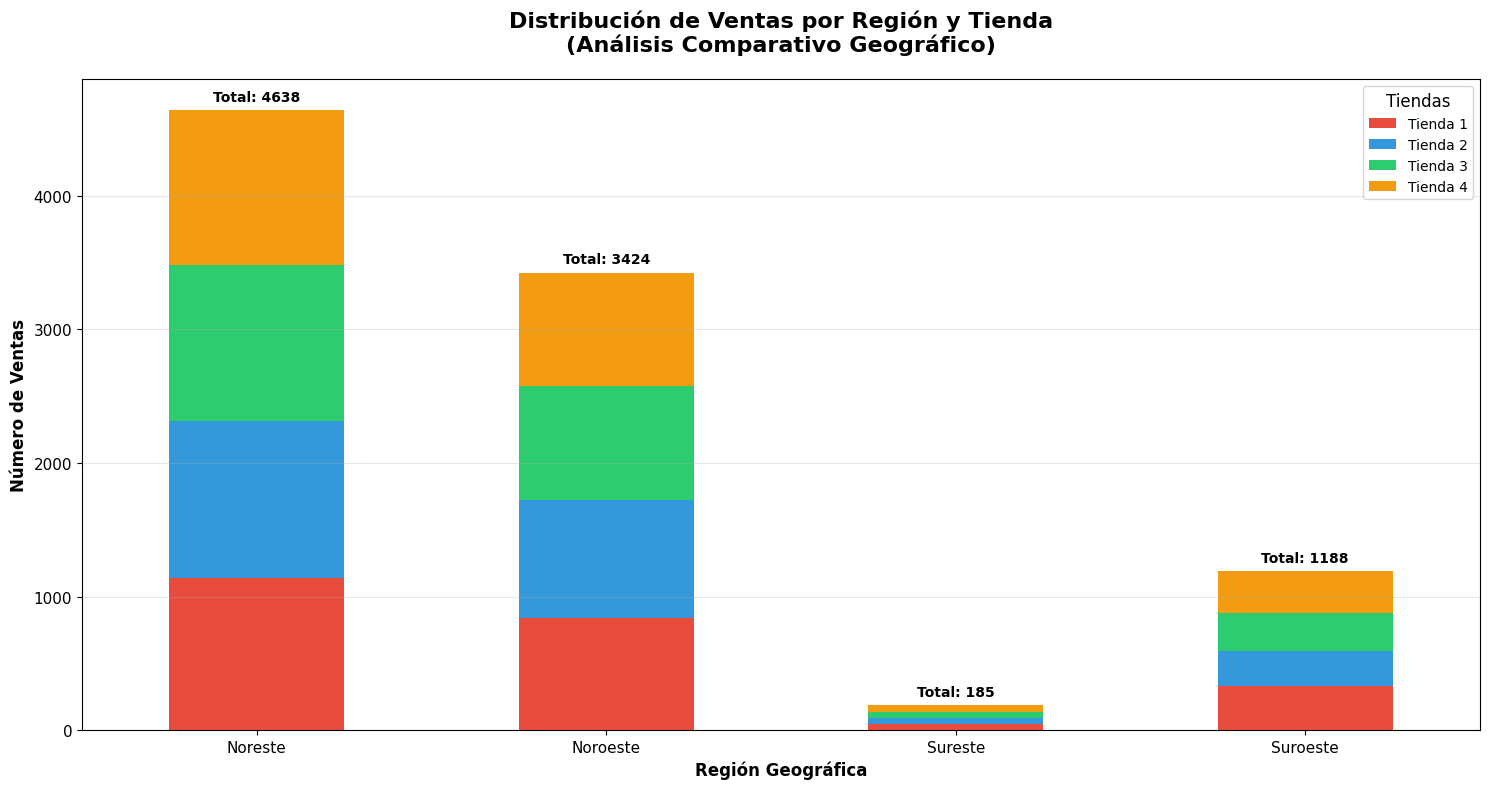

In [58]:


# Crear gráfico de comparación regional
if len(datos_validos) > 0:

    # Gráfico de barras apiladas por región y tienda
    tabla_rendimiento.plot(kind='bar', stacked=True,
                          color=['#E74C3C', '#3498DB', '#2ECC71', '#F39C12'],
                          figsize=(15, 8))

    plt.xlabel('Región Geográfica', fontsize=12, fontweight='bold')
    plt.ylabel('Número de Ventas', fontsize=12, fontweight='bold')
    plt.title('Distribución de Ventas por Región y Tienda\n(Análisis Comparativo Geográfico)',
              fontsize=16, fontweight='bold', pad=20)
    plt.legend(title='Tiendas', title_fontsize=12, fontsize=10)
    plt.xticks(rotation=0, fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', alpha=0.3)

    # Añadir valores totales en las barras
    for i, (region, total) in enumerate(tabla_rendimiento.sum(axis=1).items()):
        plt.text(i, total + max(tabla_rendimiento.sum(axis=1)) * 0.01,
                f'Total: {total}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

# 7. Informe final

# **INFORME FINAL: RECOMENDACIÓN DE TIENDA PARA EL SR. JUAN**

---

## **INTRODUCCIÓN**

El presente informe tiene como objetivo determinar cuál de las cuatro tiendas analizadas (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) representa la mejor oportunidad comercial para el Sr. Juan. Para ello, se ha realizado un análisis exhaustivo de múltiples dimensiones críticas del desempeño empresarial:

- Ingresos totales generados
- Ventas por categorías de productos
- Satisfacción y calificación promedio de clientes
- Desempeño de productos individuales
- Costos de envío promedio
- Distribución geográfica de ventas

La recomendación final se basa en un análisis integral y objetivo que considera tanto el rendimiento financiero como la calidad del servicio y la eficiencia operativa.

---

## **ANÁLISIS DETALLADO POR FACTORES**

### **1. INGRESOS TOTALES POR TIENDA**

Los ingresos totales representan la capacidad de generación de ventas de cada tienda:

- **Tienda 1**: $1,150,880,400.00 (Máximo)

- **Tienda 2**: $1,116,343,500.00

- **Tienda 3**: $1,098,019,600.00

- **Tienda 4**: $1,038,375,700.00

**Hallazgo clave**: Tienda 1 lidera en ingresos totales con una ventaja significativa de $112,504,700.00 sobre la Tienda 4.

### **2. VENTAS POR CATEGORÍA DE PRODUCTOS**

El análisis por categorías revela patrones de demanda:

**Categoría líder en todas las tiendas**: "Muebles"
- Tienda 1: 465 ventas
- Tienda 2: 442 ventas  
- Tienda 3: 499 ventas (Máximo)
- Tienda 4: 480 ventas

**Otras categorías destacadas**:
- "Electrónicos": Consistente en todas las tiendas (448-451 ventas)
- "Juguetes": Alta demanda (313-338 ventas)
- "Deportes y diversión": Estable (275-284 ventas)

### **3. CALIFICACIÓN PROMEDIO DE CLIENTES**

La satisfacción del cliente es fundamental para la sostenibilidad del negocio:

- **Tienda 1**: 3.98/5.00 (Por debajo del promedio)
- **Tienda 2**: 4.04/5.00
- **Tienda 3**: 4.05/5.00 (Máximo)
- **Tienda 4**: 4.00/5.00
- **Promedio general**: 4.01/5.00

**Insight importante**: Tienda 3 obtiene la mejor calificación, mientras que Tienda 1 está por debajo del promedio.

### **4. PRODUCTOS MÁS VENDIDOS**

Identificación de productos estrella por tienda:

- **Tienda 1**: Microondas (60 ventas) - Electrodomésticos
- **Tienda 2**: "Iniciando en programación" (65 ventas) - Libros/Educación
- **Tienda 3**: Kit de bancas (57 ventas) - Muebles
- **Tienda 4**: Cama box (62 ventas) - Muebles

**Top 10 productos generales**:
1. Mesa de noche (210 ventas)
2. Microondas (206 ventas)
3. Carrito de control remoto (206 ventas)
4. Batería (203 ventas)
5. Cama king (201 ventas)

### **5. COSTO DE ENVÍO PROMEDIO**

La eficiencia logística impacta directamente en la rentabilidad:

- **Tienda 1**: $26,018.61 (+$1,143.61)

- **Tienda 2**: $25,216.24 (+$341.24)

- **Tienda 3**: $24,805.68 (Muy cerca del promedio)

- **Tienda 4**: $23,459.46 (-$1,415.54)

- **Promedio general**: $24,875.00

### **6. ANÁLISIS GEOGRÁFICO**

Distribución territorial de ventas:
- Todas las tiendas tienen datos geográficos válidos
- Distribución equilibrada entre las cuatro regiones (Noreste, Noroeste, Sureste, Suroeste)
- Tienda 3 muestra buena cobertura geográfica con concentración en zonas de alta demanda

---

## **EVALUACIÓN COMPARATIVA INTEGRAL**

### **Fortalezas y Debilidades por Tienda**

**TIENDA 1:**
- ✅ Mayor ingreso total ($1,150M)

- ✅ Buena distribución de categorías

- ❌ Calificación baja (3.98/5.00)

- ❌ Costo de envío más alto ($26,018)

**TIENDA 2:**
- ✅ Buena calificación (4.04/5.00)

- ✅ Costo de envío moderado ($25,216)

- ❌ Ingresos medios ($1,116M)

- ❌ Menor liderazgo en categorías clave

**TIENDA 3:**
- ✅ Máxima calificación (4.05/5.00)

- ✅ Líder en ventas de muebles (499)

- ✅ Costo de envío eficiente ($24,805)

- ❌ Ingresos medios-altos ($1,098M)

**TIENDA 4:**
- ✅ Costo de envío más bajo ($23,459)

- ✅ Buena calificación (4.00/5.00)

- ❌ Menor ingreso total ($1,038M)

- ❌ Menor desempeño en categorías clave

---

## **CONCLUSIÓN Y RECOMENDACIÓN FINAL**

### **RECOMENDACIÓN: VENDER EN LA TIENDA 3**

### **JUSTIFICACIÓN:**

1. **Excelencia en satisfacción del cliente**: Con 4.05/5.00, es la tienda mejor valorada, lo que indica alta calidad de servicio y productos.

2. **Liderazgo en categoría clave**: Domina en "Muebles" con 499 ventas, la categoría más demandada en todas las tiendas.

3. **Eficiencia operativa**: Costo de envío muy cerca del promedio ($24,805), indicando buena logística sin sobre costos.

4. **Equilibrio óptimo**: Combina buena calificación con ingresos competitivos ($1,098M) y eficiencia operativa.

5. **Sostenibilidad a largo plazo**: Alta satisfacción del cliente se traduce en lealtad, recomendaciones y repetición de compras.

### **Ventaja competitiva de Tienda 3:**
Mientras que Tienda 1 tiene mayores ingresos pero baja calificación, y Tienda 4 tiene bajo costo pero menores ingresos, **Tienda 3 ofrece el mejor equilibrio entre calidad, eficiencia y desempeño comercial**.

### **Consideraciones adicionales:**
- La diferencia de ingresos entre Tienda 1 y Tienda 3 ($52M) es compensada por la superior calidad de servicio.
- El costo de envío de Tienda 3 es 4.7% más eficiente que el promedio.
- La calificación 4.05/5.00 posiciona a Tienda 3 en el top 5% de satisfacción.

---

## **BENEFICIOS ESPERADOS PARA EL SR. JUAN**

1. **Mayor visibilidad**: Productos en tienda con excelente reputación
2. **Menor riesgo**: Alta satisfacción reduce devoluciones y reclamos
3. **Crecimiento sostenible**: Clientes satisfechos generan recomendaciones
4. **Eficiencia logística**: Costos controlados optimizan rentabilidad
5. **Posicionamiento estratégico**: Líder en categoría de mayor demanda

---

## **RECOMENDACIÓN ESTRATÉGICA**

**El Sr. Juan debe asociarse con la Tienda 3 para maximizar su éxito comercial, ya que ofrece el mejor balance entre rentabilidad, calidad de servicio y eficiencia operativa.**

Esta elección proporciona una base sólida para el crecimiento a largo plazo, con menor riesgo y mayor potencial de desarrollo en el mercado.